In [1]:
import numpy as np
import torch
import scipy
import matplotlib.pyplot as plt

In [2]:
from scipy import interpolate

In [3]:
def logn_fct(grid, num_fct, num_sample = 10, mean = 0., sigma = 1.):
    
    assert num_sample < len(grid)
    
    idx = np.arange(0, len(grid), int(len(grid)/num_sample) + 1)
    idx[-1] = len(grid) - 1
    
    x = grid[idx]
    
    U = []
    for _ in range(num_fct):
        
        u = np.random.lognormal(mean, sigma, size = num_sample)
        f = interpolate.interp1d(x, u, kind = 'quadratic')
        U.append(f(grid))
    
    return np.stack(U)

In [4]:
nx = 101
num_fct = 3

In [5]:
x = np.linspace(0, 1, nx)
D = logn_fct(x, num_fct)

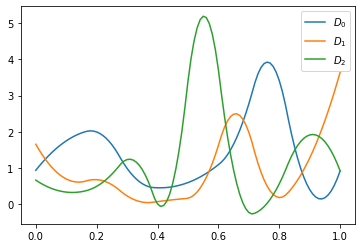

In [6]:
for i in range(len(D)) :
    plt.plot(x, D[i], label=f'$D_{i}$')
    
plt.legend()
plt.show()

In [7]:
def delta(y, x, dy = 1., dx = 0.) :
    """    
    y : int, float or ndarray of size 1
    x : ndarray
    
    return dy if x = y and dx otherwise
    """
    if torch.is_tensor(y):
        return torch.where(torch.isclose(torch.Tensor(x), y), dy, dx)
    if not isinstance(y, np.ndarray):
        y = np.array(y)
    return np.where(np.array(x) == y, dy, dx)

In [8]:
Y = x[np.argmax(D, 1)].reshape(-1, 1)

In [9]:
F = delta(Y, x)

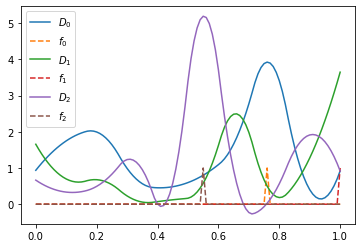

In [10]:
for i in range(len(D)) :
    plt.plot(x, D[i], label=f'$D_{i}$')
    plt.plot(x, F[i], '--',label=f'$f_{i}$')
    
plt.legend()
plt.show()